## Deal imbalanced data

after **missing values and outliers**, more often we face the problem of **Imbalanced data**. lets see how to deal with Imbalanced data

### Techniques

lets see most used techniques in dealing with imbalanced data

###  What is imbalanced data

A class or a target varibale is said to be imbalanced when we have data in the ratio of 99:1 or 98:2, which means like data set is loaded hevily with only one kind of data in the Target variable.
### causes:
This might increase the accuracy havily as the dataset is loaded only with one kind of data. but that's not good when you apply it to test set. Its called Metric trap. Using simpler metrics like accuracy_score can be misleading. then use confusion matrix to know that this accuracy_score is fit or not. ex: - Confusion matrix:
 [[114709      0]
 [  4334      0]]

you can see here that using confusion matrix says it again it is imbalanced data. Also when you use Heatmap, you can see no correlation between variables. If they are balanced, you can find correlation else you couldn't
### solutions: 
**Resampling**
 - **Over sampling/Up sampling**
     - Random minority over-sampling with replacement
     - SMOTE - Synthetic Minority Over-sampling Technique
     - many more
 - **Under sampling/Down sampling**
     - Random majority under-sampling with replacement
     - Extraction of majority-minority Tomek links
     - many more
 - **Over-sampling followed by under-sampling/combining over and under sampling**
     - SMOTE + Tomek links
     - SMOTE + ENN
 - **Change the performance metrics**
     - AUC
     - ROC Curve
     - f1-Score
 - **Ensemble classifiers/tree based model**
     - Decision trees
     - Random forests
     - XGBoost
     
**Each and Every method in Oversampling and undersampling have their own advantages and disadvantages**.

### References:-
  - [diving deep imbalanced data datacamp](https://www.datacamp.com/community/tutorials/diving-deep-imbalanced-data)
  - [Sklearn imbalanced learn](https://github.com/scikit-learn-contrib/imbalanced-learn)
  - [Resampling strategies for imbalanced dataset](https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets)
  - [Elite datascience imbalance datasets](https://elitedatascience.com/imbalanced-classes)
  - [Solving imbalanced dataset](https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb)

### Dataset
you can download the dataset [here](https://www.kaggle.com/mlg-ulb/creditcardfraud/) at kaggle on **Credit fraud detection**.

#### import libraries

In [1]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#showsplotsinnotebook
%matplotlib inline

#avoids warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read the dataset
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

we have 31 columns with 30 columns in float datatype and 1 column in int datatype.

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#lets check missing values
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

we have no null values or missing values in data set.

In [7]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

## Data exploration

(array([284315.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,    492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

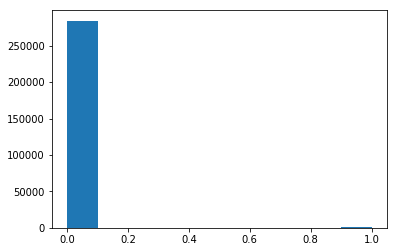

In [8]:
plt.hist(data.Class)

In [15]:
data['Class'].value_counts()[0]

284315

In [19]:
data['Class'].value_counts()[1]

492

In [18]:
print('The number of Non-Frauds are: ' + str(data['Class'].value_counts()[0]) + ' which is ', 
      round(data['Class'].value_counts()[0]/len(data) * 100,2), '% of the dataset')
print('The number of Frauds are: ' + str(data['Class'].value_counts()[1]) + ' which is ', 
      round(data['Class'].value_counts()[1]/len(data) * 100,2), '% of the dataset')

The number of Non-Frauds are: 284315 which is  99.83 % of the dataset
The number of Frauds are: 492 which is  0.17 % of the dataset


Clearly you can see that our Data had **Imbalance** in it. As i said above you can use heatmap to see the correlation between the input and the target variable.

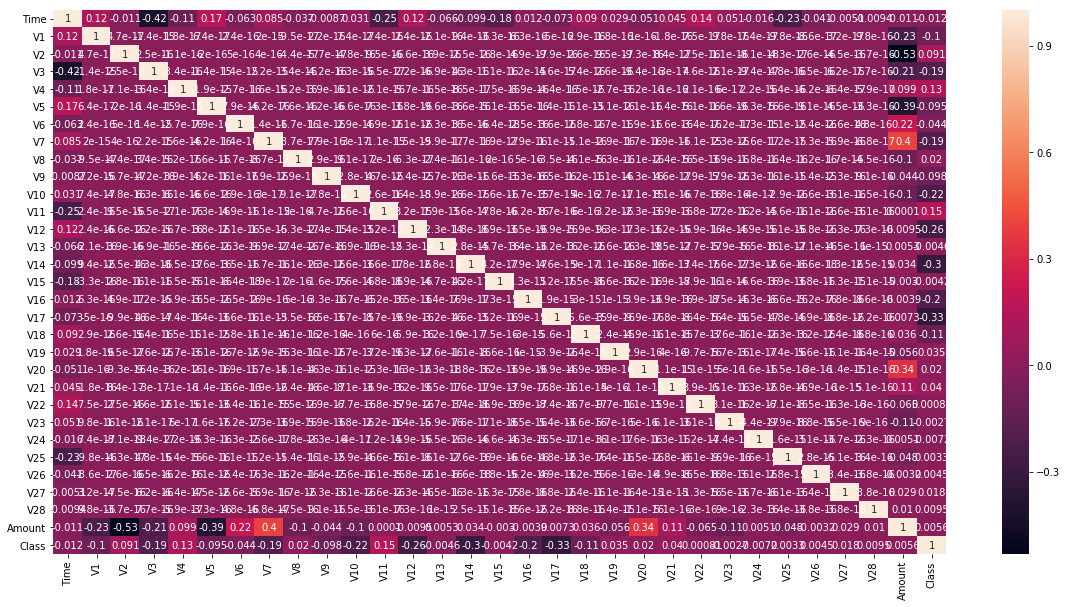

In [27]:
fig, ax = plt.subplots(figsize=(20,10)) 

corr = data.corr()
ax = sns.heatmap(corr, annot = True)
plt.show()

lets take either **down sampling or upsampling** since our data is highly skewed, so lets normalize by taking any of 2 methods.

In [29]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

data = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = data.loc[data['Class'] == 1]
non_fraud_df = data.loc[data['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
270790,164256.0,2.027015,-0.600922,-1.052655,0.737600,-0.569147,-0.785292,-0.248199,-0.275615,-0.481998,...,-0.017349,0.555889,-0.020392,-0.030081,0.258455,-0.313771,0.034163,-0.040582,50.00,0
154684,102572.0,-28.709229,22.057729,-27.855811,11.845013,-18.983813,6.474115,-43.557242,-41.044261,-13.320155,...,-22.797604,8.316275,5.466230,0.023854,-1.527145,-0.145225,-5.682338,-0.439134,0.01,1
188975,128216.0,-2.999973,0.469785,-1.830787,-1.043059,2.041088,-1.419339,-0.405755,-3.117209,-0.504147,...,3.026240,-0.774693,-1.135155,-0.369208,0.107815,0.608534,0.627930,-0.542429,17.04,0
152019,96717.0,-3.705856,4.107873,-3.803656,1.710314,-3.582466,1.469729,-9.621560,-11.913105,-0.322297,...,-5.498772,2.941475,0.916236,-0.255504,-0.183835,-0.584539,-0.315484,-0.097223,1.00,1
163586,116067.0,0.949241,1.333519,-4.855402,1.835006,-1.053245,-2.562826,-2.286986,0.260906,-0.895366,...,0.306598,-0.854627,0.101177,-0.281497,0.024444,-0.107944,0.625289,0.315677,65.00,1


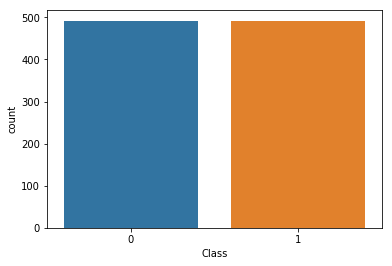

In [32]:
sns.countplot('Class', data = new_df)

Now 
- look for **outliers**.
- Scale the **time and amount**.
- build the model
- check for accuracy

**Resources**:
[kaggle- credit fraud dealing with imbalanced](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)

[credit card fraud detection](https://github.com/wmlba/innovate2019/blob/master/Credit_Card_Fraud_Detection.ipynb)